In [1]:
#NAIVE BAYES IMPLEMENTATION
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("telecom_churn.csv")

In [3]:
df.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Random Numbers from Uniform Distribution,Train_Test_Split
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,0.31,Training
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.84,Testing
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.24,Training
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,0.10,Training
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,0.21,Training


In [4]:
df.dtypes

state                                          object
account length                                  int64
area code                                       int64
international plan                             object
voice mail plan                                object
number vmail messages                           int64
total day minutes                             float64
total day calls                                 int64
total day charge                              float64
total eve minutes                             float64
total eve calls                                 int64
total eve charge                              float64
total night minutes                           float64
total night calls                               int64
total night charge                            float64
total intl minutes                            float64
total intl calls                                int64
total intl charge                             float64
customer service calls      

In [5]:
df.shape

(3333, 22)

In [6]:
#To check whether there are any misising values:
df.isnull().sum()

state                                         0
account length                                0
area code                                     0
international plan                            0
voice mail plan                               0
number vmail messages                         0
total day minutes                             0
total day calls                               0
total day charge                              0
total eve minutes                             0
total eve calls                               0
total eve charge                              0
total night minutes                           0
total night calls                             0
total night charge                            0
total intl minutes                            0
total intl calls                              0
total intl charge                             0
customer service calls                        0
churn                                         0
 Random Numbers from Uniform Distributio

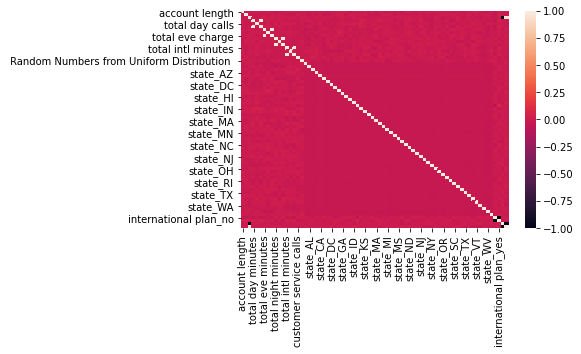

In [26]:
import seaborn as sns
correlation=X.corr()
ax=sns.heatmap(correlation)


In [7]:
#SPLITTING THE DATA INTO INDEPENDENT AND DEPENDENDENT VARIABLES

df=df.drop(['Train_Test_Split'],axis=1)
X=df.drop(['churn'],axis=1)
Y=df['churn']

In [8]:
#Encodng the categorical features:
char=df.select_dtypes(include='object')
char.dtypes

state                 object
international plan    object
voice mail plan       object
dtype: object

In [9]:
char_features=['state','international plan','voice mail plan']
X_char=pd.get_dummies(X[char_features])
X_num=df.drop(['state','international plan','voice mail plan'],axis=1)
X_all=pd.concat([X_num,X_char],axis=1,join="inner")
X=X_all.drop(['churn'],axis=1)
X.shape


(3333, 72)

In [10]:
from sklearn.feature_selection import VarianceThreshold
varcutoff=VarianceThreshold()
X=pd.DataFrame(varcutoff.fit_transform(X),index=X.index,columns=X.columns)
X.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#outlier removal:
floor=df.quantile(0.99)
floor

account length                                195.0000
area code                                     510.0000
number vmail messages                          43.0000
total day minutes                             305.1680
total day calls                               146.0000
total day charge                               51.8768
total eve minutes                             318.9360
total eve calls                               147.0000
total eve charge                               27.1136
total night minutes                           317.4480
total night calls                             146.6800
total night charge                             14.2840
total intl minutes                             16.6680
total intl calls                               13.0000
total intl charge                               4.5004
customer service calls                          6.0000
churn                                           1.0000
 Random Numbers from Uniform Distribution       0.9900
Name: 0.99

In [12]:
ceil=df.quantile(0.01)
ceil

account length                                 12.3200
area code                                     408.0000
number vmail messages                           0.0000
total day minutes                              51.8320
total day calls                                54.0000
total day charge                                8.8132
total eve minutes                              79.5240
total eve calls                                53.0000
total eve charge                                6.7592
total night minutes                            79.4280
total night calls                              57.0000
total night charge                              3.5764
total intl minutes                              3.3320
total intl calls                                1.0000
total intl charge                               0.8996
customer service calls                          0.0000
churn                                           0.0000
 Random Numbers from Uniform Distribution       0.0100
Name: 0.01

In [13]:
#Outlier capping:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [14]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,437.182418,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,...,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,39.276205,42.371290,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,...,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,12.320000,408.000000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,195.000000,510.000000,43.000000,305.168000,146.000000,51.876800,318.936000,147.000000,27.113600,317.448000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
Y=df['churn']

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_std=pd.DataFrame(stdsc.fit_transform(X),index=X.index,columns=X.columns)

In [17]:
#Train test split:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [18]:
#checking for randomness of train and test by testing the venet rates across the two datasets:
Y_train.mean()

0.14573510501500214

In [19]:
Y_test.mean()

0.143

In [20]:
#BUILDING THE NAIVE BAYES MODEL:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [21]:
y_pred=clf.predict(X_test)

In [22]:
#Model evaluation:
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(Y_test,y_pred))
print("precision",metrics.precision_score(Y_test,y_pred))
print("recall",metrics.recall_score(Y_test,y_pred))

accuracy: 0.569
precision 0.185589519650655
recall 0.5944055944055944


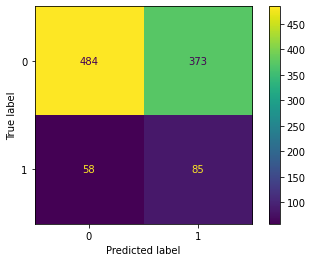

In [23]:
#Lets plot the confusion matrix:
metrics.plot_confusion_matrix(clf,X_test,Y_test)

In [24]:
#Visualizing the model performance-Lorenz Curve
y_pred_prob = clf.predict_proba(X)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.425150,142.0,142.0,0.293996,0.293996,0.10021,0.10021,1,2.933797
1,9,333,0.234234,78.0,220.0,0.161491,0.455487,0.09991,0.20012,2,2.276067
2,8,333,0.150150,50.0,270.0,0.103520,0.559006,0.09991,0.30003,3,1.863168
3,7,333,0.093093,31.0,301.0,0.064182,0.623188,0.09991,0.39994,4,1.558205
4,6,333,0.156156,52.0,353.0,0.107660,0.730849,0.09991,0.49985,5,1.462136
5,5,334,0.116766,39.0,392.0,0.080745,0.811594,0.10021,0.60006,6,1.352522
6,4,333,0.072072,24.0,416.0,0.049689,0.861284,0.09991,0.69997,7,1.230458
7,3,333,0.066066,22.0,438.0,0.045549,0.906832,0.09991,0.79988,8,1.133710
8,2,333,0.078078,26.0,464.0,0.053830,0.960663,0.09991,0.89979,9,1.067652
9,1,334,0.056886,19.0,483.0,0.039337,1.000000,0.10021,1.00000,10,1.000000


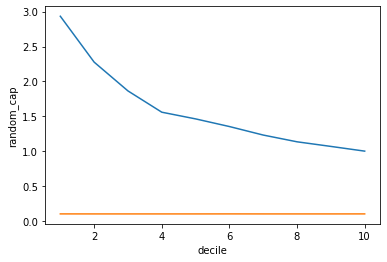

In [25]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)